<center style="font-size:48px;">Question 3 Observations</center>
<br>
Like most datasets, the data you were provided is imperfect, with possible issues such as missing data, conflicting data, data of varying resolutions, outliers, or other kinds of confusing data. Considering data is primarily spatiotemporal, describe how you identified and addressed the uncertainties and conflicts inherent in this data to reach your conclusions in questions 1 and 2.

# Importing Libraries

In [6]:
# Data Science
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Answer

This dataset was very dirty. There were problems with both sets of data; purchases and location. The problems I identified were:

- Location

    - Varying time deltas between data points

                Inspecting the time lapse heatmaps it is easy to see that there are a varying amount of data points per hour. Further looking at a single individual confims that sometimes the location data is reported every second, sometimes once a minute, and sometimes there is nothing for hours.

                We could partly reconcile this by resampling the data. For each person i resampled their location to one minute intervals (the file size was too big for GitHub if I did a one second sample). This allowed the time deltas to be more consitant at one minute. However, there were still "holes" sporidically during the day and more frequently at night. An easy solution could be to backfill null values with the previous location. However, this would greatly grow the dataset without adding any valuable information and potentially skewing the data. I therefore deided to do nothing about these holes.

    - Two records for a person at a single timestamp

                This was another problem I noticed in my EDA steps. This was fixed during the above mentioned resampling. 

    - Outliers

                There were some outliers on the dataset. Using a violin plot I say that the outliers were not too extreme. Wiith the point of the project to identify outliers and to translate them into suspects the outliers contained valuable information that shouldn't necessarily be altered or dropped. Because of this, I kept any potential outliers that way I could inspet them and deteremine if they were real and relevant to the investigation.

    - Trucker Driver's sharing vehicles

                While we had purchase information about truck drivers they were not assigned a company car and therefore they didn't have any location data explicitly given. Were were given information about the five different trucks that were shared. We could asume that these were being driven by someone with a Truck Driver job title. If someone other then a Truck Driver were to drive it somewhere suspicious it would show up graphical and we could investigate further to ascertain who was driver through  purchase data. This was my general approach to analysis location data for the trucks. Find anamolys, use purchases to try and tie an employee to the truck, and look at their typical behavior.

- Purchases

    - Reconciling purchases in both the loyalty and credit card datasets

                During EDA I was combined both the loyalty card and the credit card purchases (~70% of the transactions). By sample the data and looking at just the purchases of an individual I noticed that many of the purchases were in both datasets. I also noticed that sometimes the dollar amount of the purchases were different. Additionaly, the loyalty data just gave you the day while the credit card dataset also gave you the time.

                To solve this I did a custom merge of both datasets where I combined the duplicate transactions by keping the credit card timestamp and the loyaty card price (more on why in the next bullet point). I was kept track of all of the loyalty purchases through a bollean variable.

    - Purchase Price Outliers

                Additonally, there were outlier prices. I was able to identify these through violin plots and in the inspection mentioned in the previous section. These were trickier to deal with as outlier detection was the major point to this project. Decifiering between actually outliers (suspects) and bad data was nearly impossible so it I couldn't do much about this. 
                
                As I mentioned before I did find differences in price between the same purchase in both the loyalty and credit card datasets. Further exploring the duplicates, I found that the outliers were almost all in the credit card dataset. Therefore, while combining the two datasets I took the price of the loyalty dataset fro any of the duplicate purchases.

    - Transaction reporting time

                Another interesting observation I found was the time that purchase transactions were dated. In the credit card dataset it seemd that some transactions were reported in real time. In other instances the transactions were updated in bulk typically at the end of the day. Additionally, looking at some of the purchases for an individual place smetimes they reported transactions in bulk, sometimes in real time, and there didn't seem to be a pettern to when a location would choose to upload in bulk vs. real time.  Finally, the loyalty purchases only had day reported and not time. So for the transactions that were only in this dataset I only had day as well. I had to keep this in mind when looking at oddities in the puchase data. I focused more on day then hour and minute.
            
    - More employees represented then what was given in car assignment dataset 

                During my EDA on combined datasets I found that there were some employees that were in the purchase datatset but not the car assignments. This meant that these employees most likely didn't have a car assigned to them. The drawback to this is that I wasn't able to get the job information for that employee (as it was in the car assignments). These were still valuable data points so I couldn't drop them. To handle this I filled these null values with the value "Other.

# Time Commitment Estimation

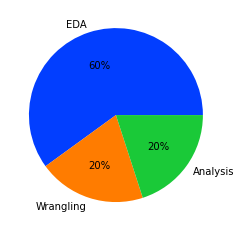

In [7]:
# Time Estimates
time = pd.DataFrame([
    {'Part' : 'EDA', 'Percent' : 0.6},
    {'Part' : 'Wrangling', 'Percent' : 0.2},
    {'Part' : 'Analysis', 'Percent' : 0.2}
])
# Plot
colors = sns.color_palette('bright')[0:3]
plt.pie(time['Percent'], labels = time['Part'], colors = colors,autopct='%.0f%%')
plt.savefig('../images/TimeCommitment.jpg')
plt.show()

<div>
    <span style="width:600px;display:inline-block;text-align:left">
        <a href="./ObservationsQ2.ipynb">&#60;&#60;Observations Question 2</a>
    </span>
</div>
<div>
    <center>
        <span style="width:200px;display:inline-block;text-align:center">
            <a href="./Master.ipynb">Master Notebook</a>
        </span>
        <span style="width:200px;display:inline-block;text-align:center">
            <a href="../README.md">Table of Contents</a>
        </span>
    </center>
</div>